In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np

2023-06-13 17:12:24.642374: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-13 17:12:24.764201: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-13 17:12:24.764220: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-13 17:12:24.782533: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-13 17:12:25.392343: W tensorflow/stream_executor/platform/de

In [2]:
from CLASSML.cleaning import cleaning

In [14]:
data = pd.read_csv(r'raw_data/df_det.csv')

/tmp/ipykernel_28694/2824180083.py:1: DtypeWarning: Columns (17,26,27,29,30,35,36,38,40,41,43,44,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'raw_data/df_det.csv')


In [4]:
data.columns


Index(['Unnamed: 0', 'BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME',
       'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID',
       'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE',
       'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE',
       'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT',
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
       'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY',
       'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO',
       'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME',
       'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE',
       'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT',
       'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

In [5]:
month_data = data.groupby('MONTH_NAME').agg({'EVENT_ID':'count'}).reset_index()

In [6]:
month_data
month_data.rename(columns={'EVENT_ID': 'NUMBER_OF_TORNADOS'}, inplace=True)

In [8]:
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

In [9]:
month_data = month_data.sort_values('MONTH_NAME', key = lambda x : x.apply (lambda x : month_dict[x]))

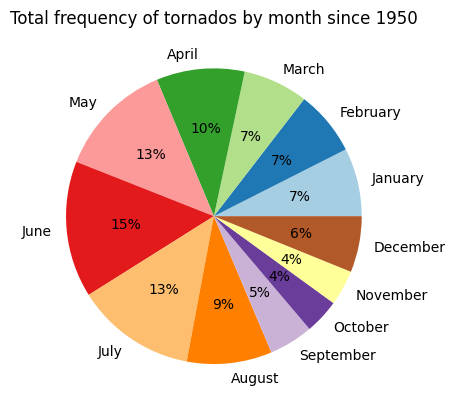

In [10]:
# declaring data
data = month_data['NUMBER_OF_TORNADOS']
keys = month_data['MONTH_NAME']
  
# declaring exploding pie
# define Seaborn color palette to use
palette_color = sns.color_palette('Paired')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title("Total frequency of tornados by month since 1950")#, bbox={'facecolor':'0.8', 'pad':5})

plt.savefig('pie_chart.png')
# displaying chart
plt.show()

In [15]:
data.columns


Index(['Unnamed: 0', 'BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME',
       'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID',
       'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE',
       'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE',
       'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT',
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
       'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY',
       'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO',
       'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME',
       'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE',
       'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT',
       'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

In [28]:
data['TOR_LENGTH'].max()

2315.0

In [29]:
data['TOR_LENGTH'].mean()

0.9264233879481837

In [31]:
data['TOR_LENGTH'].median()

0.0

<AxesSubplot:xlabel='TOR_LENGTH', ylabel='Count'>

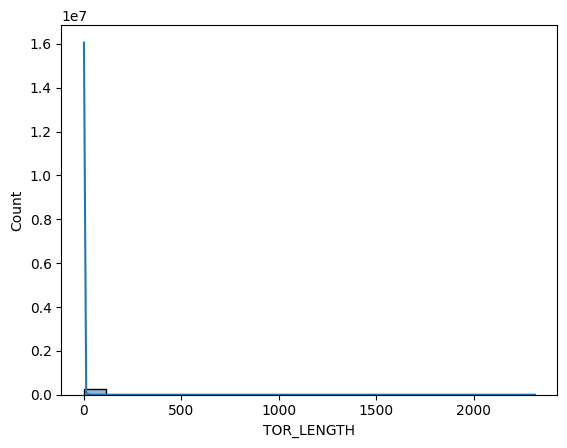

In [30]:
sns.histplot(data=data, x= data['TOR_LENGTH'], bins=20, kde=True)

In [32]:
data['TOR_WIDTH'].max()

4576.0

In [33]:
data['TOR_WIDTH'].mean()

35.26649340065419

In [34]:
data['TOR_WIDTH'].median()

0.0

<AxesSubplot:xlabel='TOR_WIDTH', ylabel='Count'>

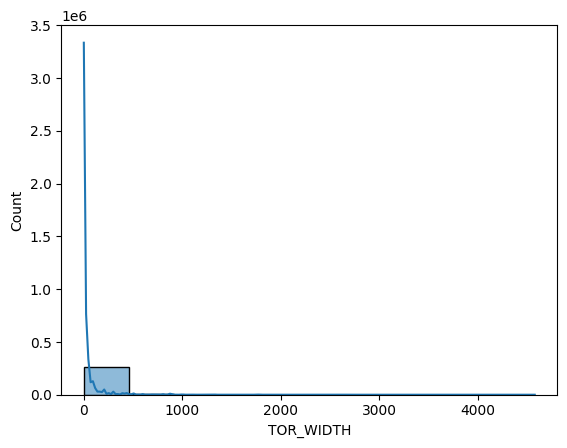

In [39]:
sns.histplot(data=data, x= data['TOR_WIDTH'], bins=10, kde=True)
#plt.xscale('log')